<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#LLMGA" data-toc-modified-id="LLMGA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LLMGA</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#config" data-toc-modified-id="config-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#No.-of-genomes" data-toc-modified-id="No.-of-genomes-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>No. of genomes</a></span></li><li><span><a href="#CheckM" data-toc-modified-id="CheckM-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CheckM</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Taxonomic-novelty" data-toc-modified-id="Taxonomic-novelty-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Taxonomic novelty</a></span></li><li><span><a href="#Quality-~-taxonomy" data-toc-modified-id="Quality-~-taxonomy-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Quality ~ taxonomy</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* running `LLMGA` on metagenome datasets
* studyID = PRJNA476660
  * host = pangolin

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/'
tmp_out_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/'
pipeline_dir = '/ebio/abt3_projects/methanogen_host_evo/bin/llmga-find-refs/'

studyID = 'PRJNA476660'
threads = 24

# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
set.seed(8304)

source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

# LLMGA

## Setup

In [4]:
out_dir = file.path(tmp_out_dir, studyID) 
make_dir(out_dir)
out_dir = file.path(out_dir, 'LLMGA')
make_dir(out_dir)

Created directory: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660 
Created directory: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA 


In [5]:
ref_genomes = file.path(work_dir, studyID, 'LLMGA-find-refs/references/ref_genomes.fna')
cat(ref_genomes)

/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects//PRJNA476660/LLMGA-find-refs/references/ref_genomes.fna

## config

In [7]:
cat_file(file.path(out_dir, 'config.yaml'))

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJNA476660/LLMGQC/final/samples.txt

# output location
output_dir: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/PRJNA476660/LLMGA/

#-- reference genome(s) for metacompass --#
metacompass_ref: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJNA476660/LLMGA-find-refs/references/ref_genomes.fna

#-- database --#
kraken2_db: /ebio/abt3_projects/databases_no-backup/kraken2/nt_db/hash.k2d
krakenuniq_db: /ebio/abt3_projects/databases_no-backup/krakenuniq/taxonomy/nodes.dmp
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/v2/genbank-k31.lca.json.gz
gtdbtk_db: /ebio/abt3_projects/databases_no-backup/GTDB/release89/d

## Run

```
(snakemake_dev) @ rick:/ebio/abt3_projects/vadinCA11/bin/llmga
$ screen -L -S llmga-PRJNA476660 ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/PRJNA476660/LLMGA/config.yaml cluster.json /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/PRJNA476660/LLMGA/SGE_log 24
```

In [8]:
pipelineInfo('/ebio/abt3_projects/vadinCA11/bin/llmga')

LLMGA
=====

Ley Lab Metagenome Aseembly (LLMGA)

* Version: 0.6.2
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/vadinCA11/bin/llmga/bin/envs/anvio.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- bioconda::centrifuge
- bioconda::anvio>=5.1.0
==> /ebio/abt3_projects/vadinCA11/bin/llmga/bin/envs/bbmap.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- bioconda::bbmap=37.90
==> /ebio/abt3_projects/vadinCA11/bin/llmga/bin/envs/bowtie2.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- bioconda::samtools
- bioconda::bowtie2
- bioconda::bedtools
==> /ebio/abt3_projects/vadinCA11/bin/llmga/bin/envs/checkm.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- python=2
- pigz
- bioconda::prodigal
- bioconda::pplacer
- bioconda::checkm-genome

==> /ebio/abt3_projects/vadinCA11/bin/llmga/bin/envs/concoct.yaml <==
channels:
- conda-forge
-

# Summary

In [9]:
asmbl_dir = out_dir = file.path(tmp_out_dir, studyID, 'LLMGA')

checkm_markers_file = file.path(asmbl_dir, 'checkm', 'markers_qa_summary.tsv')
gtdbtk_bac_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_bac_summary.tsv')
gtdbtk_arc_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_ar_summary.tsv')

bin_dir = file.path(asmbl_dir, 'bin')
das_tool_dir = file.path(asmbl_dir, 'bin_refine', 'DAS_Tool')
drep_dir = file.path(asmbl_dir, 'drep', 'drep')

In [10]:
# bin genomes
## maxbin2
bin_files = list.files(bin_dir, '*.fasta$', full.names=TRUE, recursive=TRUE)
bin = data.frame(binID = gsub('\\.fasta$', '', basename(bin_files)),
                 fasta = bin_files,
                 binner = bin_files %>% dirname %>% basename,
                 sample = bin_files %>% dirname %>% dirname %>% basename)

## metabat2
bin_files = list.files(bin_dir, '*.fa$', full.names=TRUE, recursive=TRUE)
X = data.frame(binID = gsub('\\.fa$', '', basename(bin_files)),
               fasta = bin_files,
               binner = bin_files %>% dirname %>% basename,
               sample = bin_files %>% dirname %>% dirname %>% basename)

## combine
bin = rbind(bin, X)
X = NULL
bin %>% dfhead

[1] 249   4


binID,fasta,binner,sample
coassemble_contigs.001,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/bin/MJGMD1/maxbin2_high_prob/coassemble_contigs.001.fasta,maxbin2_high_prob,MJGMD1
coassemble_contigs.002,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/bin/MJGMD1/maxbin2_high_prob/coassemble_contigs.002.fasta,maxbin2_high_prob,MJGMD1
coassemble_contigs.003,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/bin/MJGMD1/maxbin2_high_prob/coassemble_contigs.003.fasta,maxbin2_high_prob,MJGMD1


In [11]:
# DAS-tool genomes
dastool_files = list.files(das_tool_dir, '*.fa$', full.names=TRUE, recursive=TRUE)

dastool = data.frame(binID = gsub('\\.fa$', '', basename(dastool_files)),
                    fasta = dastool_files)
dastool %>% dfhead

[1] 29  2


binID,fasta
MJGMD1__maxbin2_high_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/MJGMD1__maxbin2_high_prob.001.contigs.fa
MJGMD1__maxbin2_high_prob.004.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/MJGMD1__maxbin2_high_prob.004.contigs.fa
MJGMD1__maxbin2_high_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/MJGMD1__maxbin2_high_prob.005.contigs.fa


In [12]:
# drep genome files
P = file.path(drep_dir, 'dereplicated_genomes')
drep_files = list.files(P, '*.fa$', full.names=TRUE)

drep = data.frame(binID = gsub('\\.fa$', '', basename(drep_files)),
                  fasta = drep_files)
drep %>% dfhead

[1] 26  2


binID,fasta
MJGMD1__maxbin2_high_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/drep/drep/dereplicated_genomes/MJGMD1__maxbin2_high_prob.001.contigs.fa
MJGMD1__maxbin2_high_prob.004.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/drep/drep/dereplicated_genomes/MJGMD1__maxbin2_high_prob.004.contigs.fa
MJGMD1__maxbin2_high_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/drep/drep/dereplicated_genomes/MJGMD1__maxbin2_high_prob.005.contigs.fa


In [13]:
# checkm info
markers_sum = read.delim(checkm_markers_file, sep='\t')
markers_sum %>% nrow %>% print

drep_j = drep %>%
    inner_join(markers_sum, c('binID'='Bin.Id')) 

drep_j %>% dfhead

[1] 29


Warning message:
“Column `binID`/`Bin.Id` joining factors with different levels, coercing to character vector”

[1] 26 30


binID,fasta,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,GC.std..scaffolds...1kbp.,Coding.density,Translation.table,X..predicted.genes,X0,X1,X2,X3,X4,X5.
MJGMD1__maxbin2_high_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/drep/drep/dereplicated_genomes/MJGMD1__maxbin2_high_prob.001.contigs.fa,f__Enterobacteriaceae (UID5124),134,1173,336,99.37,0.04,0.00,4575340,⋯,2.57,87.95,11,4251,3,1169,1,0,0,0
MJGMD1__maxbin2_high_prob.004.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/drep/drep/dereplicated_genomes/MJGMD1__maxbin2_high_prob.004.contigs.fa,g__Bacteroides (UID2691),33,839,309,98.20,3.70,48.39,5544799,⋯,3.86,90.33,11,4482,14,796,28,1,0,0
MJGMD1__maxbin2_high_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/drep/drep/dereplicated_genomes/MJGMD1__maxbin2_high_prob.005.contigs.fa,c__Gammaproteobacteria (UID4442),899,311,184,99.02,0.26,50.00,3653222,⋯,4.58,87.55,11,3460,16,291,4,0,0,0


In [14]:
# gtdb
## bacteria
X = read.delim(gtdbtk_bac_sum_file, sep='\t') %>%
    dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
    separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
X %>% nrow %>% print
## archaea
# Y = read.delim(gtdbtk_arc_sum_file, sep='\t') %>%
#     dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
#     separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
# Y %>% nrow %>% print

## combined
drep_j = drep_j %>%
    left_join(X, c('binID'='user_genome'))

## status
X = Y = NULL
drep_j %>% dfhead

[1] 29


Warning message:
“Column `binID`/`user_genome` joining character vector and factor, coercing into character vector”

[1] 26 53


binID,fasta,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
MJGMD1__maxbin2_high_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/drep/drep/dereplicated_genomes/MJGMD1__maxbin2_high_prob.001.contigs.fa,f__Enterobacteriaceae (UID5124),134,1173,336,99.37,0.04,0.00,4575340,⋯,N/A,N/A,N/A,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__,ANI/Placement,topological placement and ANI have incongruent species assignments,99.27,11,N/A,N/A
MJGMD1__maxbin2_high_prob.004.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/drep/drep/dereplicated_genomes/MJGMD1__maxbin2_high_prob.004.contigs.fa,g__Bacteroides (UID2691),33,839,309,98.20,3.70,48.39,5544799,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__Bacteroides thetaiotaomicron,98.69,0.91,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__,ANI/Placement,topological placement and ANI have congruent species assignments,98.37,11,N/A,N/A
MJGMD1__maxbin2_high_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJNA476660/LLMGA/drep/drep/dereplicated_genomes/MJGMD1__maxbin2_high_prob.005.contigs.fa,c__Gammaproteobacteria (UID4442),899,311,184,99.02,0.26,50.00,3653222,⋯,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Morganella;s__Morganella morganii,98.81,0.97,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Morganella;s__,ANI/Placement,topological placement and ANI have congruent species assignments,91.98,11,N/A,N/A


## No. of genomes

In [16]:
cat('Number of binned genomes:', bin$fasta %>% unique %>% length)

Number of binned genomes: 249

In [17]:
cat('Number of DAS-Tool passed genomes:', dastool$binID %>% unique %>% length)

Number of DAS-Tool passed genomes: 29

In [18]:
cat('Number of 99% ANI de-rep genomes:', drep_j$binID %>% unique %>% length)

Number of 99% ANI de-rep genomes: 26

## CheckM

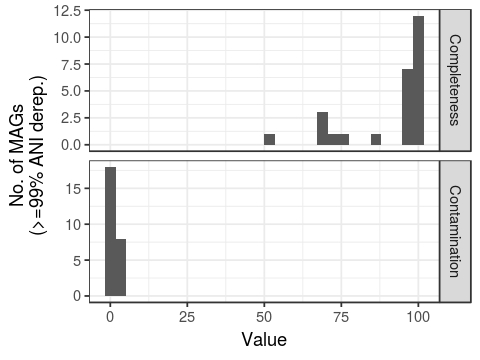

In [19]:
# checkm stats
p = drep_j %>%
    dplyr::select(binID, Completeness, Contamination) %>%
    gather(Metric, Value, -binID) %>%
    ggplot(aes(Value)) +
    geom_histogram(bins=30) +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    facet_grid(Metric ~ ., scales='free_y') +
    theme_bw()

dims(4,3)
plot(p)

## Taxonomy

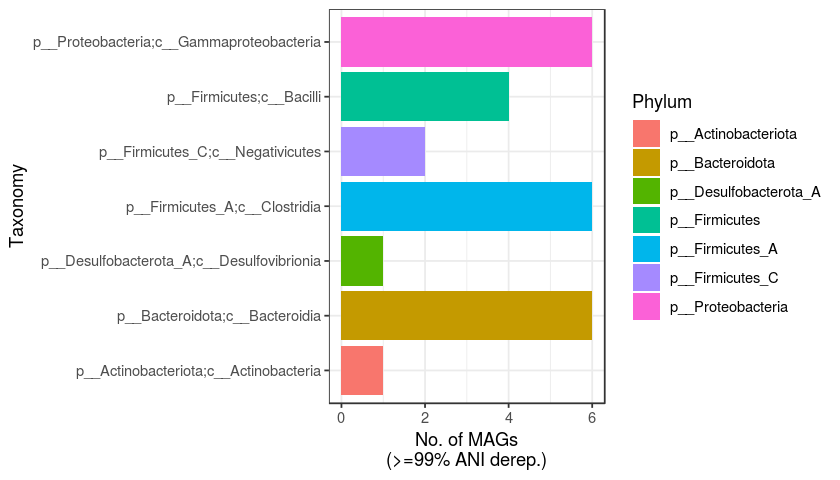

In [20]:
# summarizing by taxonomy
p = drep_j %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    theme_bw() 

dims(7,4)
plot(p)

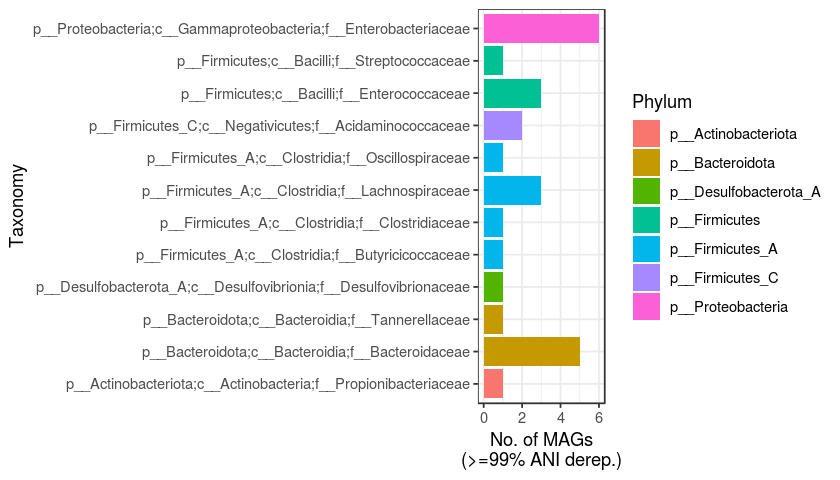

In [21]:
# summarizing by taxonomy
p = drep_j %>%
    unite(Taxonomy, Phylum, Class, Family, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    theme_bw() 

dims(7,4)
plot(p)

### Taxonomic novelty

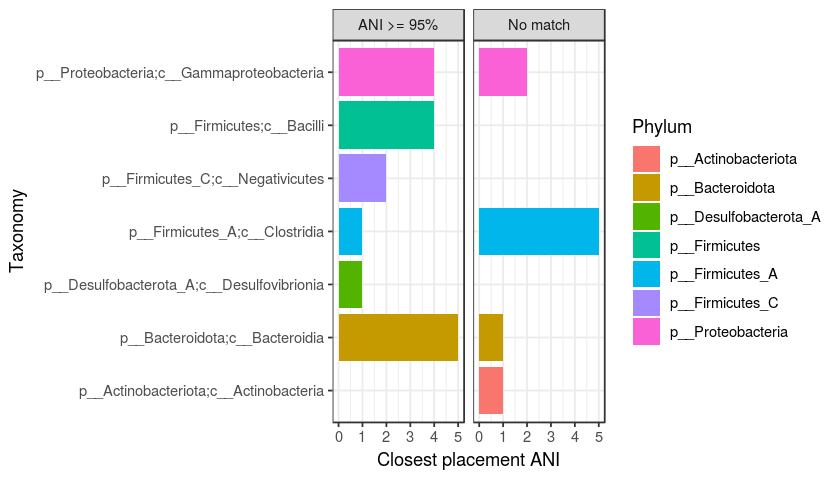

In [22]:
# no close ANI matches 
p = drep_j %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    mutate(closest_placement_ani = closest_placement_ani %>% as.character,
           closest_placement_ani = ifelse(closest_placement_ani == 'N/A', 
                                          0, closest_placement_ani),
           closest_placement_ani = ifelse(is.na(closest_placement_ani), 
                                          0, closest_placement_ani),
           closest_placement_ani = closest_placement_ani %>% as.Num) %>%
    mutate(has_species_placement = ifelse(closest_placement_ani >= 95,
                                          'ANI >= 95%', 'No match')) %>%
    ggplot(aes(Taxonomy, fill=Phylum)) +
    geom_bar() +
    facet_grid(. ~ has_species_placement) +
    coord_flip() +
    labs(y='Closest placement ANI') +
    theme_bw() 

dims(7,4)
plot(p)

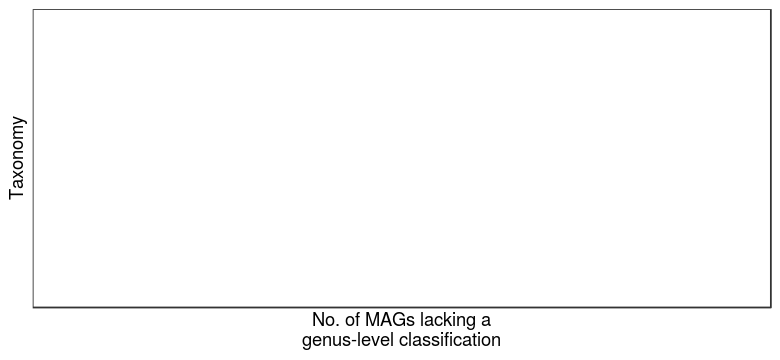

In [23]:
p = drep_j %>%
    filter(Genus == 'g__') %>%
    unite(Taxonomy, Phylum, Class, Order, Family, sep='; ', remove=FALSE) %>%
    mutate(Taxonomy = stringr::str_wrap(Taxonomy, 45),
           Taxonomy = gsub(' ', '', Taxonomy)) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs lacking a\ngenus-level classification') +
    theme_bw() 

dims(6.5,3)
plot(p)

### Quality ~ taxonomy

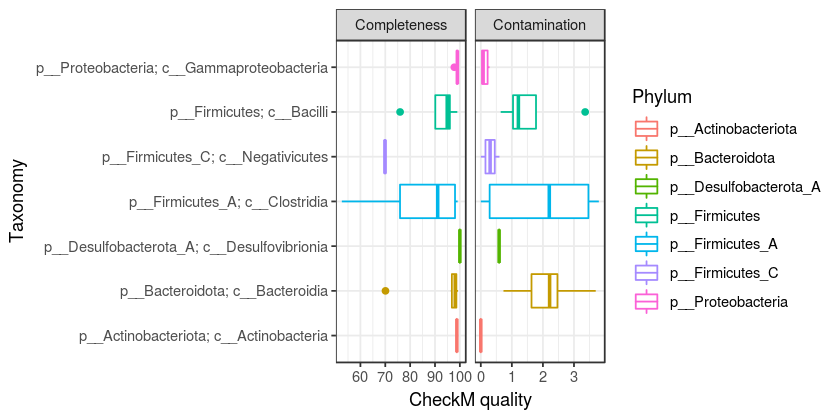

In [24]:
p = drep_j %>%
    unite(Taxonomy, Phylum, Class, sep='; ', remove=FALSE) %>%
    dplyr::select(Taxonomy, Phylum, Completeness, Contamination) %>%
    gather(Metric, Value, -Taxonomy, -Phylum) %>%
    ggplot(aes(Taxonomy, Value, color=Phylum)) +
    geom_boxplot() +
    facet_grid(. ~ Metric, scales='free_x') +
    coord_flip() +
    labs(y='CheckM quality') +
    theme_bw() 

dims(7,3.5)
plot(p)

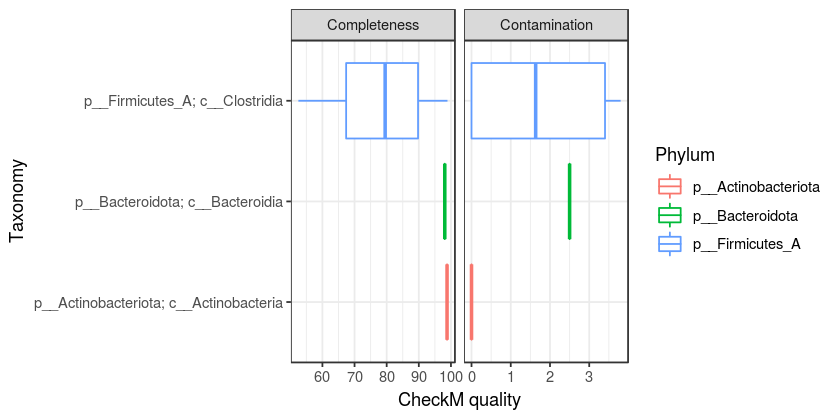

In [25]:
# just unclassified at genus/species
p = drep_j %>%
    filter(Genus == 'g__' | Species == 's__') %>%
    unite(Taxonomy, Phylum, Class, sep='; ', remove=FALSE) %>%
    dplyr::select(Taxonomy, Phylum, Completeness, Contamination) %>%
    gather(Metric, Value, -Taxonomy, -Phylum) %>%
    ggplot(aes(Taxonomy, Value, color=Phylum)) +
    geom_boxplot() +
    facet_grid(. ~ Metric, scales='free_x') +
    coord_flip() +
    labs(y='CheckM quality') +
    theme_bw() 

dims(7,3.5)
plot(p)

# sessionInfo

In [26]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec